In [1]:
#install and import dependencies

In [2]:
!pip install easyocr
!pip install imutils

In [360]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
import pytesseract

In [361]:
tes_path = r'C:\Users\Mahi\AppData\Local\tesseract.exe'

In [ ]:
reader = easyocr.Reader(['en'])


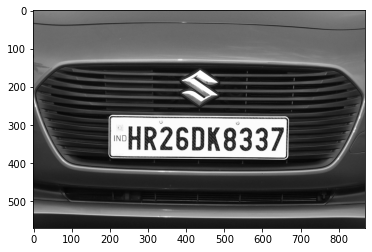

In [372]:
img = cv2.imread('images/img3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

In [373]:
#Apply filter and edges for localization

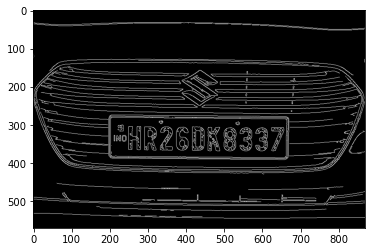

In [374]:
bfilter = cv2.bilateralFilter(gray, 5, 20, 100) #Noise Reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))


In [375]:
#Find Contours and Apply Mask

In [376]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10 ]

In [377]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 20, True)
    if len(approx) == 4:
        print("yes")
        location = approx
        break

yes


In [378]:
location

array([[[198, 282]],

       [[663, 278]],

       [[669, 381]],

       [[206, 387]]], dtype=int32)

In [379]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

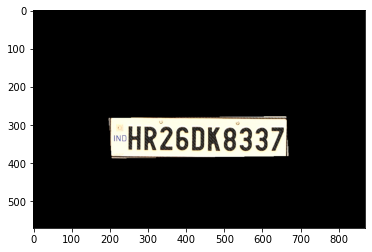

In [380]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

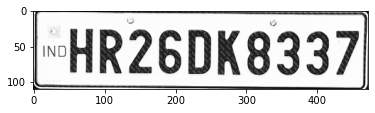

In [381]:
(x, y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
img = gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


            

In [382]:
#Use Easy OCR To Read Text

In [388]:
# result = reader.readtext(img)
# result

In [395]:
img = cv2.resize(img, None, fx=1.4, fy= 1.4, interpolation=cv2.INTER_CUBIC)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(img, 3)
pytesseract.pytesseract.tesseract_cmd = tes_path
text = pytesseract.image_to_string(img, lang='eng', config='--psm 6')
text.strip()

"'-HR26DK8337|"

In [396]:
#Render Result

In [398]:
# # text = result[0][-2]
# font = cv2.FONT_HERSHEY_SIMPLEX
# res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=0.7, color=(0,0,255), thickness=2, lineType=cv2.LINE_AA)
# res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
# plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))